# Submission Guidelines:
### Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission. Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.ipynb.

# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [127]:
import pandas as pd

df = pd.read_csv("bank-full_2016.csv")

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [128]:
print(f"1. The dimensions of the table are {df.shape}")

1. The dimensions of the table are (45211, 17)


In [129]:
print(f"2. The different attributes in it are {df.columns.tolist()}")

2. The different attributes in it are ['age', 'job', 'marital', 'education', 'default_credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days_from_last_contact', 'previous_campaign_contacts', 'previous_campaign_outcome', 'outcome']


In [130]:
print("A frequency table of the 'outcome' category in the table:")
df['outcome'].value_counts()

A frequency table of the 'outcome' category in the table:


outcome
no     39922
yes     5289
Name: count, dtype: int64

In [131]:
print("The first 5 rows of the table:")
df.head(5)

The first 5 rows of the table:


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


3) What is the data type of each attribute in the table?

In [132]:
print("The data type of each attribute in the table is:")
df.dtypes

The data type of each attribute in the table is:


age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [133]:
df['isContactKnown'] = df['contact'] == "unknown"
df['contact']

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object

2) Change the type of the 'campaign' attribute to Categorical data.

In [134]:
df['campaign'].convert_dtypes('category')
df['campaign'].dtype

dtype('int64')

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [135]:
df.describe()

,age,balance,day,duration,campaign,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

<Axes: >

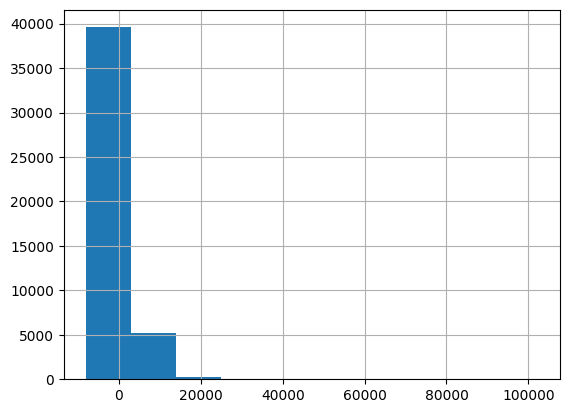

In [136]:
df['balance'].hist()

<Axes: >

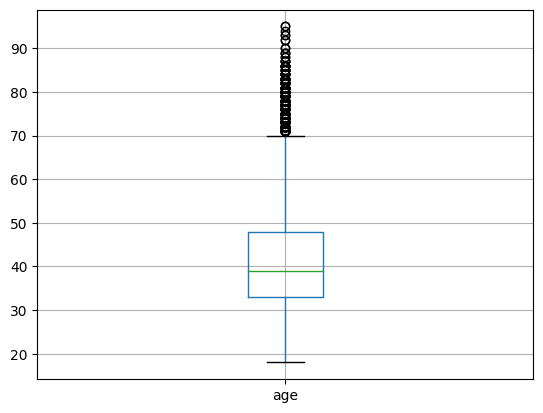

In [137]:
df.boxplot(column='age')

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

<Axes: title={'center': 'Balances for positive outcomes'}>

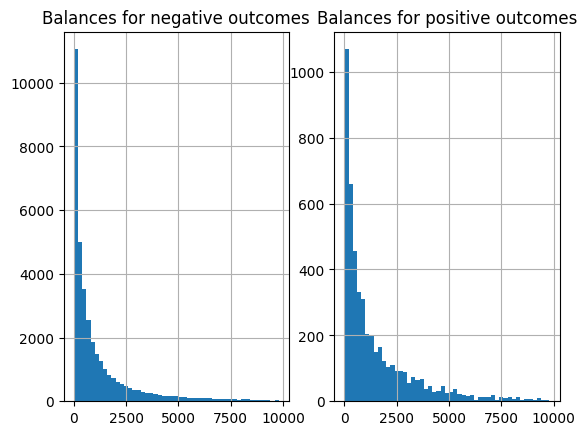

In [138]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_title("Balances for negative outcomes")
df[df["outcome"] == "no"]['balance'].hist(ax=axes[0], grid=True, bins=[i*200 for i in range(50)])

axes[1].set_title("Balances for positive outcomes")
df[df["outcome"] == "yes"]['balance'].hist(ax=axes[1], grid=True, bins=[i*200 for i in range(50)])


In [139]:
print("People with positive outcome has a balance of about 10 times more than people with negative outcome (makes sense). Other then that, the distribution between the two groups look pretty similar")

People with positive outcome has a balance of about 10 times more than people with negative outcome (makes sense). Other then that, the distribution between the two groups look pretty similar


# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [140]:
null_count = df.isnull().sum()
null_count[null_count > 0]

days_from_last_contact    36954
dtype: int64

In [141]:
print("If the meaning is that 'unknown' is also indicating a missing value, than:")
unknown_count = (df == "unknown").sum()
unknown_count[unknown_count > 0]

If the meaning is that 'unknown' is also indicating a missing value, than:


job                            288
education                     1857
contact                      13020
previous_campaign_outcome    36959
dtype: int64

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [142]:
new_df = df[(df["contact"] == 'cellular') | (df["contact"] == 'cellular')]
new_df

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,NaN,0,unknown,no,False
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,NaN,0,unknown,no,False
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,NaN,0,unknown,no,False
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,NaN,0,unknown,no,False
12662,28,blue-collar,single,secondary,no,-127,yes,no,cellular,4,jul,1044,3,NaN,0,unknown,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,NaN,0,unknown,yes,False
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,NaN,0,unknown,yes,False
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,NaN,0,unknown,yes,False
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184.0,3,success,yes,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [143]:
df[df['days_from_last_contact'].isnull()]['previous_campaign_contacts'].max()

0

In [144]:
df[df['days_from_last_contact'].notnull()]['previous_campaign_contacts'].min()

1

In [145]:
print("As we can see, the missing values represent clients that did not have a previous campaign contact. We can see that if a client did have at least 1, the value"
      "is not null")

As we can see, the missing values represent clients that did not have a previous campaign contact. We can see that if a client did have at least 1, the valueis not null


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

In [146]:
df['balance'].value_counts(bins=7)

balance
(-8129.147, 7716.143]     43836
(7716.143, 23451.286]      1254
(23451.286, 39186.429]       92
(39186.429, 54921.571]       16
(54921.571, 70656.714]        8
(70656.714, 86391.857]        3
(86391.857, 102127.0]         2
Name: count, dtype: int64

<Axes: xlabel='balance'>

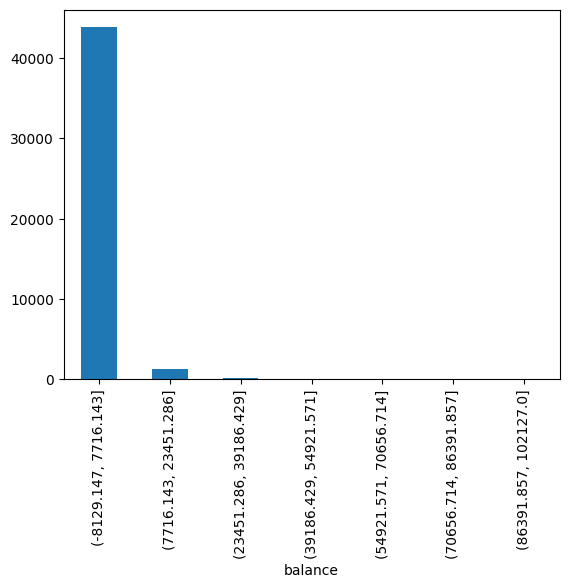

In [147]:
df['balance'].value_counts(bins=7).plot(kind='bar')

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

In [148]:
pd.qcut(df['age'], 6).value_counts(sort=False)

age
(17.999, 31.0]    9026
(31.0, 35.0]      7881
(35.0, 39.0]      6455
(39.0, 45.0]      7401
(45.0, 52.0]      7040
(52.0, 95.0]      7408
Name: count, dtype: int64

<Axes: xlabel='age'>

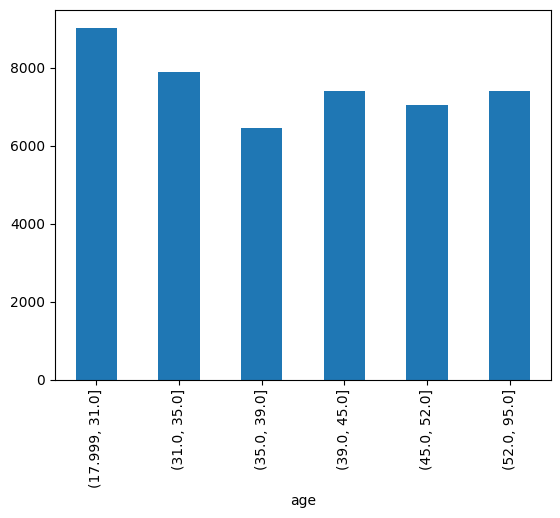

In [149]:
pd.qcut(df['age'], 6).value_counts(sort=False).plot(kind='bar')

3) Propose a way to further discretize the Month column.

In [150]:
print("We can discretize the record by seasons, meaning we'll group together each 3 consecutive month together:")
# TODO - actually write code for that

We can discretize the record by seasons, meaning we'll group together each 3 consecutive month together:


# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [151]:
print("\nPearson correlation for age-balance:")
df[["age", "balance"]].corr(method = 'pearson')


Pearson correlation for age-balance:


,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [152]:
print("\nSpearman correlation for age-balance:")
df[["age", "balance"]].corr(method = 'spearman')


Spearman correlation for age-balance:


,age,balance
age,1.00000,0.09638
balance,0.09638,1.00000


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [153]:
df.corr(method='pearson', numeric_only=True)

,age,balance,day,duration,campaign,days_from_last_contact,previous_campaign_contacts,isContactKnown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.107863,0.001288,-0.020132
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,-0.108122,0.016674,-0.037331
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.090095,-0.051710,-0.034103
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.024407,0.001203,-0.014379
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,0.050534,-0.032855,0.004853
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,0.162032
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.032855,-0.021885,1.000000,-0.154162
isContactKnown,-0.020132,-0.037331,-0.034103,-0.014379,0.004853,0.162032,-0.154162,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [154]:
from scipy.stats import entropy

# calculate entropy for each column
max_entropy = -1
max_entropy_feature = None
for col in df.columns:
    ent = entropy(df[col].value_counts(normalize=True), base=2)
    print(f'Entropy of {col}: {ent}')
    if ent > max_entropy:
          max_entropy = ent
          max_entropy_feature = col

print(f"Feature with max entropy is {max_entropy_feature} with {max_entropy}")

Entropy of age: 5.319965381108414
Entropy of job: 3.055352981989424
Entropy of marital: 1.3152704429934163
Entropy of education: 1.6149019975434802
Entropy of default_credit: 0.13021221197171914
Entropy of balance: 11.23729520562423
Entropy of housing_loan: 0.9909848414082716
Entropy of personal_loan: 0.6348511238851708
Entropy of contact: 1.1775253842799875
Entropy of day: 4.838726650233828
Entropy of month: 2.937380670052729
Entropy of duration: 9.313764218181575
Entropy of campaign: 2.5433971519356153
Entropy of days_from_last_contact: 8.185525133062725
Entropy of previous_campaign_contacts: 1.1954128174159335
Entropy of previous_campaign_outcome: 0.9370151397592826
Entropy of outcome: 0.5206312212538164
Entropy of isContactKnown: 0.866101498594268
Feature with max entropy is balance with 11.23729520562423


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [155]:
from sklearn.metrics import mutual_info_score

mutual_info_scores = df.dropna(axis=1).drop('outcome', axis=1).apply(lambda attribute: mutual_info_score(attribute, df['outcome']))
print(f"The attribute which has the highest Mutual Information with the 'outcome' is '{mutual_info_scores.idxmax()}'")



The attribute which has the highest Mutual Information with the 'outcome' is 'balance'


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

We can see many extreme outliers in the campaign column (the dots on the right of the right whisker):


<Axes: >

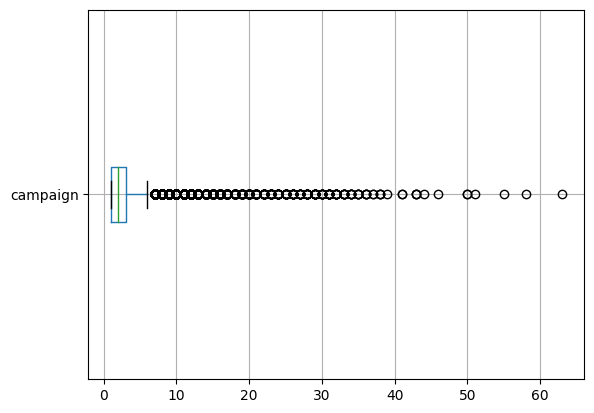

In [156]:
print ("We can see many extreme outliers in the campaign column (the dots on the right of the right whisker):")
df.boxplot(column="campaign", vert=False)

In [157]:
print("We can see from the plot that there some number of potential outliers points. We can see from the graph that the density is large around the mean, so we expect that most of the points will be roughly around 3*std+mean.")
df['campaign'] = df['campaign'].astype('int')
mean = df['campaign'].mean()
std = df['campaign'].std()
outliers_count = len(df[df['campaign']>3*std + mean])
print(f"We see that there are {outliers_count} points larger then that, which makes them outliers to us")

We can see from the plot that there some number of potential outliers points. We can see from the graph that the density is large around the mean, so we expect that most of the points will be roughly around 3*std+mean.
We see that there are 840 points larger then that, which makes them outliers to us


## Normalization - Bonus

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

Text(0.5, 1.0, 'days_from_last_contact histogram')

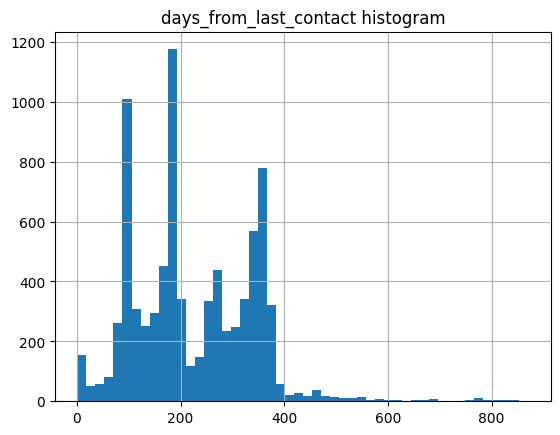

In [158]:
df["days_from_last_contact"].hist(bins=50).set_title("days_from_last_contact histogram")

from this plot we can assume that the distribution is approximately composed from 3 normal distribution therefore its good choise to choose Z normalization. But before that we will use log normalization because its a right-skewed distribution:


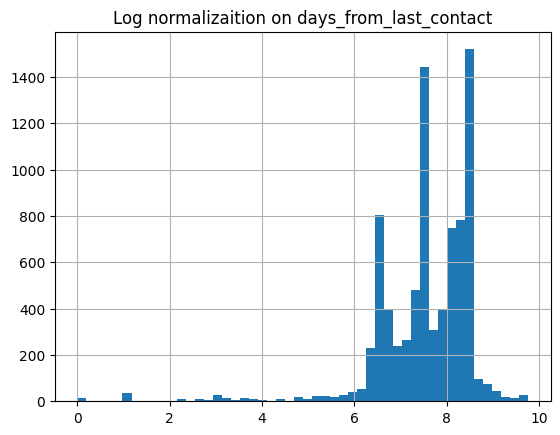

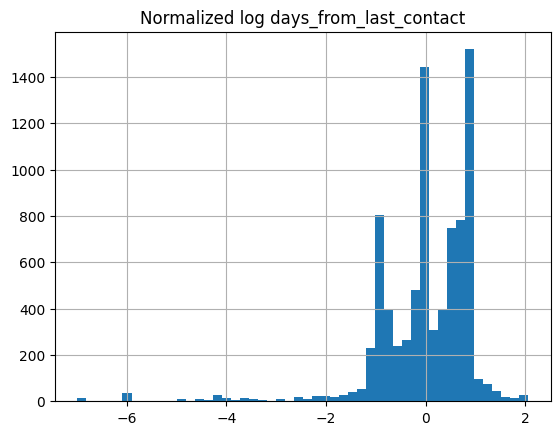

In [159]:
import numpy as np

print("from this plot we can assume that the distribution is approximately composed from 3 normal distribution therefore its good choise to choose Z normalization. But before that we will use log normalization because its a right-skewed distribution:")

log_col = np.log2(df["days_from_last_contact"])
log_col.hist(bins=50).set_title("Log normalizaition on days_from_last_contact")
plt.show()

mean = np.mean(log_col)
std = np.std(log_col)
log_z = (log_col - mean)/std
log_z.hist(bins=50).set_title("Normalized log days_from_last_contact")
plt.show()